In [1]:
import requests
import json
import pandas as pd

url0 = 'http://www.nhtsa.gov/webapi/api/Complaints/vehicle/modelyear/{}/make/{}/model/{}?format=json'

def get(make,model,searchstring):
        d = {'other':[],searchstring:[],'model year':[]}
        for year in range(2004,2011):

                print(str(year)+'\r',end='')
                # download the complaints for this make,model,year
                url = url0.format(year,make,model)
                s = requests.get(url).text
                complaints = json.loads(s)

                # count complaints whose Summary contains search string
                nc = 0
                for result in complaints['Results']:
                    if searchstring in result['Summary'].lower(): nc += 1

                d['model year'].append(year)
                d[searchstring].append(nc)
                d['other'].append(complaints['Count']-nc)

        df = pd.DataFrame.from_dict(d)
        #display(df)
        df = df[['model year',searchstring,'other']]   # reorder columns
        return df

df = get('Chevrolet','Cobalt','steer')
display(df)

,model year,steer,other
0,2004,0,0
1,2005,1184,423
2,2006,1314,922
3,2007,694,765
4,2008,291,431
5,2009,192,377
6,2010,226,214


In [2]:
df.melt( id_vars=['model year'], value_vars=['other','steer'])

,model year,variable,value
0,2004,other,0
1,2005,other,423
2,2006,other,922
3,2007,other,765
4,2008,other,431
5,2009,other,377
6,2010,other,214
7,2004,steer,0
8,2005,steer,1184
9,2006,steer,1314


In [3]:
# perhaps nice to rename those columns
ldf = df.melt( id_vars=['model year'], value_vars=['other','steer'], var_name='kind of complaint', value_name='count')
ldf

,model year,kind of complaint,count
0,2004,other,0
1,2005,other,423
2,2006,other,922
3,2007,other,765
4,2008,other,431
5,2009,other,377
6,2010,other,214
7,2004,steer,0
8,2005,steer,1184
9,2006,steer,1314


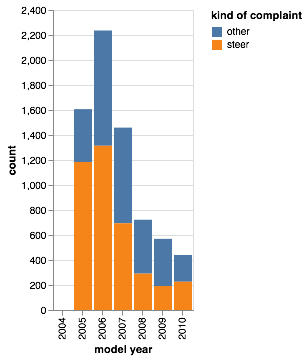

In [4]:
import altair as alt
alt.renderers.enable('notebook')
alt.Chart(ldf).mark_bar().encode(
    x='model year:O',
    y=alt.Y('count'),
    color='kind of complaint'
)

In [5]:
from vega_datasets import data
data.barley()

,yield,variety,year,site
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris
3,39.93333,Manchuria,1931,Crookston
4,32.96667,Manchuria,1931,Grand Rapids
...,...,...,...,...
115,58.16667,Wisconsin No. 38,1932,Waseca
116,47.16667,Wisconsin No. 38,1932,Morris
117,35.90000,Wisconsin No. 38,1932,Crookston
118,20.66667,Wisconsin No. 38,1932,Grand Rapids


# Datetimes

In [6]:
from datetime import datetime
datetime.fromtimestamp( 1527825600 )

datetime.datetime(2018, 6, 1, 0, 0)

In [7]:
birthday = datetime(1999,5,7,14,25)
birthday

datetime.datetime(1999, 5, 7, 14, 25)

In [8]:
now = datetime.now() #(2019,10,2,14,25)
now

datetime.datetime(2019, 10, 7, 14, 38, 42, 473649)

In [9]:
age = now-birthday
age

datetime.timedelta(7458, 822, 473649)

In [10]:
age.days

7458

# List of datetimes of all the complaint filings for one make,model,year

In [13]:
from datetime import datetime
def get(make,model,year):

        dates = []
        url = url0.format(year,make,model)
        s = requests.get(url).text
        complaints = json.loads(s)

        for result in complaints['Results']:
            date = datetime.fromtimestamp( int( result['DateComplaintFiled'][6:16] ) )
            dates.append(date)
            #break
        return dates

dates = pd.DataFrame( get('Chevrolet','Cobalt',2005), columns=['date filed'] )
display(dates)

,date filed
0,2010-02-19 00:00:00
1,2009-07-15 00:00:00
2,2011-03-21 00:00:00
3,2010-02-26 00:00:00
4,2010-09-30 00:00:00
...,...
1602,2016-10-24 00:00:00
1603,2016-10-24 00:00:00
1604,2016-11-08 08:42:48
1605,2016-11-08 09:04:03


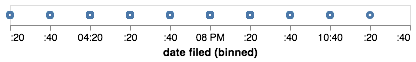

In [14]:
alt.Chart(dates).mark_point().encode(x=alt.X('date filed',bin=True))

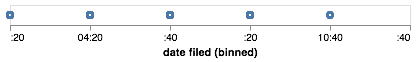

In [15]:
alt.Chart(dates).mark_point().encode(x=alt.X('date filed',bin=alt.Bin(maxbins=5)))

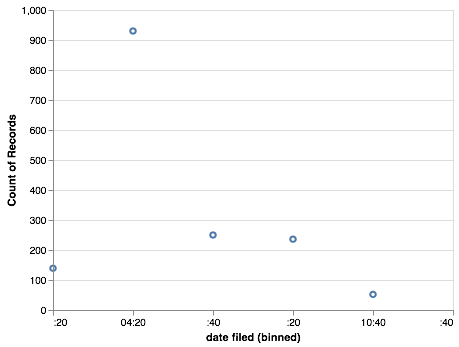

In [17]:
alt.Chart(dates).mark_point().encode(x=alt.X('date filed',bin=alt.Bin(maxbins=5)),y='count()')

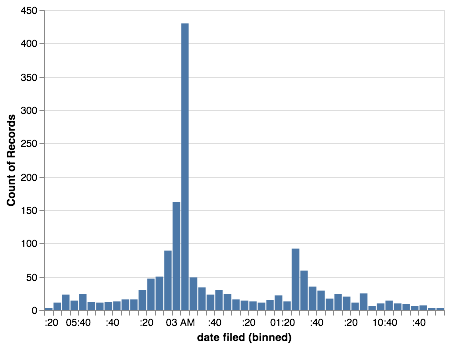

In [18]:
alt.Chart(dates).mark_bar().encode(x=alt.X('date filed',bin=alt.Bin(maxbins=50)),y='count()')

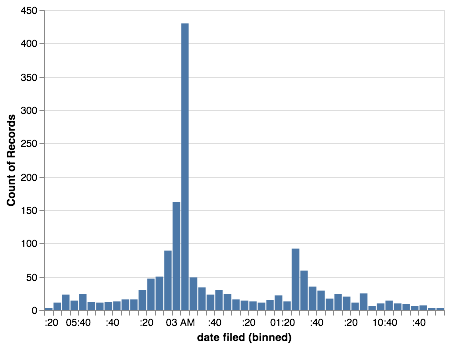

In [19]:
alt.Chart(dates).mark_bar().encode(x=alt.X('date filed',bin=alt.Bin(maxbins=50)),y='count()')

This doesn't work

alt.Chart(dates).mark_bar().encode(x=alt.X('date filed',timeUnit='yearmonthdate',bin=alt.Bin(maxbins=50)),y='count()') # ?????

# Airports

In [26]:
ap = pd.read_csv('airports.csv')
ap.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [27]:
ap.tail()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
55467,317861,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,0.0,AS,CN,CN-21,Yingkou,yes,ZYYK,YKH,NaN,NaN,https://en.wikipedia.org/wiki/Yingkou_Lanqi_Ai...,NaN
55468,32753,ZYYY,medium_airport,Shenyang Dongta Airport,41.784401,123.496002,NaN,AS,CN,CN-21,Shenyang,no,ZYYY,NaN,NaN,NaN,NaN,NaN
55469,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,http://www.sealandgov.org/,http://en.wikipedia.org/wiki/Principality_of_S...,Roughs Tower Helipad
55470,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN
55471,313629,ZZZZ,small_airport,Satsuma Iōjima Airport,30.784722,130.270556,338.0,AS,JP,JP-46,Mishima-Mura,no,RJX7,NaN,NaN,NaN,http://wikimapia.org/6705190/Satsuma-Iwo-jima-...,"SATSUMA,IWOJIMA,RJX7"


In [28]:
len(ap)

55472

In [29]:
ap = pd.read_csv('airports.csv',converters={ 'continent':lambda x:x  })
ap.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NA,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NA,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NA,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NA,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NA,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR


In [30]:
ilo = ap['elevation_ft'].idxmin()
ilo

32106

In [31]:
ap.loc[ilo]

id                                                               4421
ident                                                            LLMZ
type                                                   medium_airport
name                                              Bar Yehuda Airfield
latitude_deg                                                  31.3282
longitude_deg                                                 35.3886
elevation_ft                                                    -1266
continent                                                          AS
iso_country                                                        IL
iso_region                                                       IL-D
municipality                                                   Masada
scheduled_service                                                  no
gps_code                                                         LLMZ
iata_code                                                         MTZ
local_code          

In [32]:
ap['elevation_ft'].min()

-1266.0

In [33]:
# most northerly
ap.loc[ ap['latitude_deg'].idxmax() ]

id                                           320326
ident                                       CA-0605
type                                         closed
name                 Disraeli Inlet Water Aerodrome
latitude_deg                                  82.75
longitude_deg                                   -73
elevation_ft                                    NaN
continent                                        NA
iso_country                                      CA
iso_region                                    CA-NU
municipality                         Disraeli Inlet
scheduled_service                                no
gps_code                                        NaN
iata_code                                       NaN
local_code                                      SW6
home_link                                       NaN
wikipedia_link                                  NaN
keywords                                        NaN
Name: 13647, dtype: object

In [34]:
ap.sort_values(by='elevation_ft',ascending=False).head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
24230,35129,IN-0001,heliport,Siachen Glacier AFS Airport,35.500000,77.000000,22000.0,AS,IN,IN-JK,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN
24232,42716,IN-0003,small_airport,Daulat Beg Oldi Advanced Landing Ground,35.396467,77.928965,16200.0,AS,IN,IN-JK,NaN,no,NaN,NaN,NaN,NaN,http://en.wikipedia.org/wiki/Daulat_Beg_Oldi_A...,NaN
46029,39635,SPNH,small_airport,Laguna Choclococha Airport,-13.165700,-75.071999,14965.0,SA,PE,PE-HUV,Choclococha,no,SPNH,NaN,NaN,NaN,NaN,NaN
45980,39624,SPFA,small_airport,Fausa Airport,-14.709400,-71.731102,14809.0,SA,PE,PE-CUS,Fausa,no,SPFA,NaN,NaN,NaN,NaN,NaN
55351,327348,ZUDC,medium_airport,Daocheng Yading Airport,29.323056,100.053333,14472.0,AS,CN,CN-51,Daocheng County,yes,ZUDC,DCY,NaN,NaN,https://en.wikipedia.org/wiki/Daocheng_Yading_...,NaN


In [35]:
ap['elevation_ft'].median()

720.0

# preview of grouping and aggregation

In [36]:
ap['continent'].value_counts()

NA    27877
EU     7985
SA     7846
AS     5337
AF     3352
OC     3047
AN       28
Name: continent, dtype: int64